In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
df =  pd.read_csv("../knn/fraud_prediction.csv")
df.head()

,step,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.0,181.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0
1,1,181.0,181.0,0.0,21182.0,0.0,1,0.0,1.0,0.0,0.0,0.0
2,1,2806.0,2806.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0
3,1,2806.0,2806.0,0.0,26202.0,0.0,1,0.0,1.0,0.0,0.0,0.0
4,1,20128.0,20128.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0


In [3]:
#Assign features and targets

X = df.drop("isfraud",axis=1).values
y = df["isfraud"].values

In [4]:
# split the data for training and testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify= y)


In [5]:
#Initializing the SVM model

svm = LinearSVC(random_state= 50)

#fit the training data
svm.fit(X_train,y_train)

c:\Users\Veera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Veera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=50)

In [7]:
#Extracting the accuracy score from the training data
score = svm.score(X_test, y_test)
print(f"SVM Score:{score*100:.2f}%")

SVM Score:96.73%


Hyperparameter optimization for the linear SVMs

Graphical hyperparameter optimization

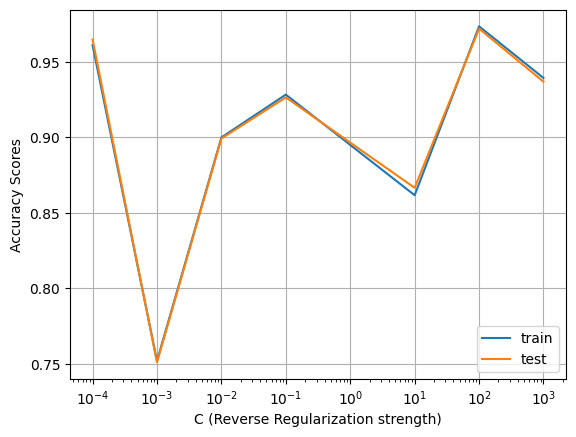

In [15]:
import warnings

# append the scores
training_scores = []
testing_scores = []

# assign params
params_list = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]

#Ignore warnings
warnings.filterwarnings("ignore")

for param in params_list:
    svm = LinearSVC(C= param, random_state=50)
    svm.fit(X_train,y_train)
    training_scores.append(svm.score(X_train,y_train))
    testing_scores.append(svm.score(X_test,y_test))

# plot the results b/w traing and testing

plt.semilogx(params_list,training_scores,params_list,testing_scores)
plt.legend(("train", "test"))
plt.xlabel('C (Reverse Regularization strength)')
plt.ylabel('Accuracy Scores')
plt.grid(True)
plt.show()

Hyperparameter optimization using GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Define the parameter grid
param_grid = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]}

# Initialize the LinearSVC model
svm = LinearSVC(random_state=50)

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print out the best parameters and best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_ *100:.2f}%')


Best parameters: {'C': 10}
Best score: 91.74%


Using the above best parameters create a pipelinr for it

In [20]:
# Create the pipeline order
pipeline_order = [
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(random_state=50, C=10))
]

# Initialize the pipeline
pipeline = Pipeline(pipeline_order)

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
accuracy = pipeline.score(X_test, y_test)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

Accuracy on test set: 99.38%


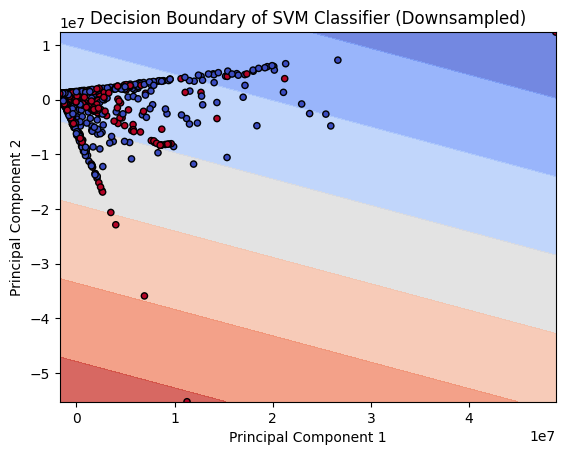

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Downsample the data
downsample_factor = 0.1  # Adjust as needed
num_samples = int(downsample_factor * len(X_train_pca))
downsampled_indices = np.random.choice(len(X_train_pca), num_samples, replace=False)
X_train_downsampled = X_train_pca[downsampled_indices]
y_train_downsampled = y_train[downsampled_indices]

# Fit the model
pipeline.fit(X_train_downsampled, y_train_downsampled)

# Plot decision boundary
x_min, x_max = X_train_downsampled[:, 0].min() - 1, X_train_downsampled[:, 0].max() + 1
y_min, y_max = X_train_downsampled[:, 1].min() - 1, X_train_downsampled[:, 1].max() + 1

# Generate a grid of points within the range of the data
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the function value for the whole grid
Z = pipeline.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_downsampled[:, 0], X_train_downsampled[:, 1], c=y_train_downsampled, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary of SVM Classifier (Downsampled)')
plt.show()
